 # Examples of the use of _pandas.resample()_ to calculate sum and average in different periods

## The input file has measurements of air temperature, relative humidity and radiation, as well as a timestamp field for each measurement. It includes one complete day of measurements, taken every 5 minutes, approximately. The measurements are _not_ exactly equidistant in time (isochronal).

## The function _pandas.resample()_ will be used to help aggregate the measurements of temperature and radiation in two different ways:
    * The temperature will be averaged into hourly temperature
    * The radiation will be integrated (added up)

# <center>*</center>

## Import needed libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()

## Read data

In [2]:
df = pd.read_csv( '../../../data/sensors_to_resample.csv', sep=';' )

### First lines of the table, just to check

In [3]:
df.head()

,Timestamp,Temperature,Rel_Humidity,PAR_Radiation
0,2018-09-16 00:05:00,22.640,34.649,0.032
1,2018-09-16 00:10:00,22.699,35.280,0.024
2,2018-09-16 00:15:00,22.700,35.237,0.051
3,2018-09-16 00:20:00,22.700,34.618,0.013
4,2018-09-16 00:25:00,22.603,34.133,0.000


### And the last lines

In [4]:
df.tail()

,Timestamp,Temperature,Rel_Humidity,PAR_Radiation
282,2018-09-16 23:37:25,22.492,35.027,0.051
283,2018-09-16 23:42:25,22.386,34.442,0.051
284,2018-09-16 23:47:25,22.198,33.610,0.025
285,2018-09-16 23:52:26,22.172,35.041,0.025
286,2018-09-16 23:57:27,22.200,35.314,0.025


## We define the index of the table (previously a consecutive number) to be the data column _Timestamp_

In [5]:
df.index = pd.DatetimeIndex( df['Timestamp'] )
df.index

DatetimeIndex(['2018-09-16 00:05:00', '2018-09-16 00:10:00',
               '2018-09-16 00:15:00', '2018-09-16 00:20:00',
               '2018-09-16 00:25:00', '2018-09-16 00:30:00',
               '2018-09-16 00:35:01', '2018-09-16 00:40:02',
               '2018-09-16 00:45:03', '2018-09-16 00:50:04',
               ...
               '2018-09-16 23:12:23', '2018-09-16 23:17:24',
               '2018-09-16 23:22:25', '2018-09-16 23:27:25',
               '2018-09-16 23:32:25', '2018-09-16 23:37:25',
               '2018-09-16 23:42:25', '2018-09-16 23:47:25',
               '2018-09-16 23:52:26', '2018-09-16 23:57:27'],
              dtype='datetime64[ns]', name='Timestamp', length=287, freq=None)

## Notice that the data type of the column was from "whatever" (_object_, in this case) into _DatetimeIndex_ (datetime64 bits)
## This is the crucial step!

In [6]:
print( df.index.dtype) 
print( df['Timestamp'].dtype )

datetime64[ns]
object


### First lines of the table (you never check too much)

In [7]:
df.head()

,Timestamp,Temperature,Rel_Humidity,PAR_Radiation
Timestamp,,,,
2018-09-16 00:05:00,2018-09-16 00:05:00,22.640,34.649,0.032
2018-09-16 00:10:00,2018-09-16 00:10:00,22.699,35.280,0.024
2018-09-16 00:15:00,2018-09-16 00:15:00,22.700,35.237,0.051
2018-09-16 00:20:00,2018-09-16 00:20:00,22.700,34.618,0.013
2018-09-16 00:25:00,2018-09-16 00:25:00,22.603,34.133,0.000


### And the last lines again

In [8]:
df.tail()

,Timestamp,Temperature,Rel_Humidity,PAR_Radiation
Timestamp,,,,
2018-09-16 23:37:25,2018-09-16 23:37:25,22.492,35.027,0.051
2018-09-16 23:42:25,2018-09-16 23:42:25,22.386,34.442,0.051
2018-09-16 23:47:25,2018-09-16 23:47:25,22.198,33.610,0.025
2018-09-16 23:52:26,2018-09-16 23:52:26,22.172,35.041,0.025
2018-09-16 23:57:27,2018-09-16 23:57:27,22.200,35.314,0.025


## Notice that the timestamps are __not__ exactly isochronal: that is our main problem here

In [9]:
df['Timestamp'].head()

Timestamp
2018-09-16 00:05:00    2018-09-16 00:05:00
2018-09-16 00:10:00    2018-09-16 00:10:00
2018-09-16 00:15:00    2018-09-16 00:15:00
2018-09-16 00:20:00    2018-09-16 00:20:00
2018-09-16 00:25:00    2018-09-16 00:25:00
Name: Timestamp, dtype: object

In [10]:
df['Timestamp'].tail()

Timestamp
2018-09-16 23:37:25    2018-09-16 23:37:25
2018-09-16 23:42:25    2018-09-16 23:42:25
2018-09-16 23:47:25    2018-09-16 23:47:25
2018-09-16 23:52:26    2018-09-16 23:52:26
2018-09-16 23:57:27    2018-09-16 23:57:27
Name: Timestamp, dtype: object

## Just to show it more clearly, we can check the difference (discret derivative, for the sake of precision) between timestamps

In [11]:
duration_between_timestamps = df.index.to_series().diff()

## Convert to seconds to compare more easily

In [12]:
duration_between_timestamps = duration_between_timestamps.dt.seconds

In [13]:
print( duration_between_timestamps.min() )
print( duration_between_timestamps.max() )

300.0
302.0


## Plot the number of seconds between measurements

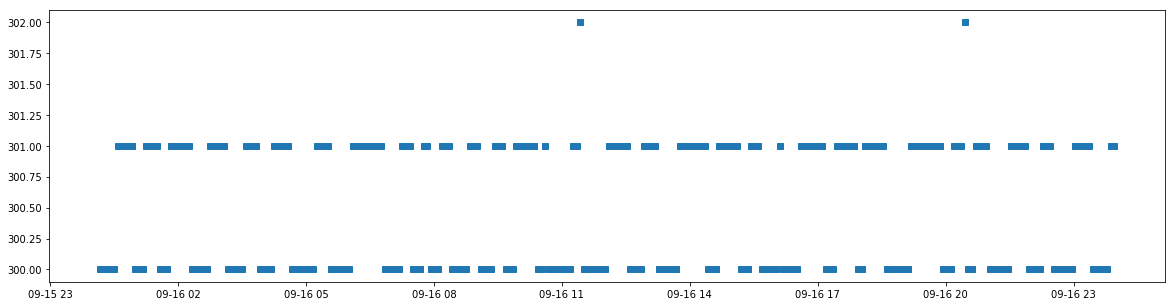

In [14]:
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(20,5) )
ax.plot( df.index, duration_between_timestamps, linestyle='', marker='s' ) 
plt.show()

### Doesn't seem like a big deal, a shift of one or two seconds, but towards midnight it adds up to a couple of minutes, we don't have the measurements at the "minute 5" anymore

In [15]:
df['Timestamp'].tail()

Timestamp
2018-09-16 23:37:25    2018-09-16 23:37:25
2018-09-16 23:42:25    2018-09-16 23:42:25
2018-09-16 23:47:25    2018-09-16 23:47:25
2018-09-16 23:52:26    2018-09-16 23:52:26
2018-09-16 23:57:27    2018-09-16 23:57:27
Name: Timestamp, dtype: object

## This is the problem to solve, and we want to do it with _pandas.resample_

### For _resample_ to work properly, the series must have a time index, as stated in the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html):
    Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

#### (that was the reason to use DatetimeIndex previously)

## If we have that index, we can do things like:

In [16]:
print( df.index.min(), df.index.max() )

2018-09-16 00:05:00 2018-09-16 23:57:27


In [17]:
print( df.resample( '1H' ).mean().index.min(), df.resample( '1H' ).mean().index.max() )

2018-09-16 00:00:00 2018-09-16 23:00:00


In [18]:
print( df.resample( '5Min' ).mean().index.min(), df.resample( '5Min' ).mean().index.max() )

2018-09-16 00:05:00 2018-09-16 23:55:00


#### For the record, _5 minutes_ can be '5Min' or '5T' ('5M' are 5 months)

In [19]:
print( df.resample( '5M' ).mean().index.min(), df.resample( '5M' ).mean().index.max() )
print( df.resample( '5Min' ).mean().index.min(), df.resample( '5Min' ).mean().index.max() )
print( df.resample( '5T' ).mean().index.min(), df.resample( '5T' ).mean().index.max() )

2018-09-30 00:00:00 2018-09-30 00:00:00
2018-09-16 00:05:00 2018-09-16 23:55:00
2018-09-16 00:05:00 2018-09-16 23:55:00


## What happened?

### What happened was:
.resample( 'new intevals' ).mean()

### The index is recalculated to 1 hour or 5 minutes, and the _mean_(!) is taken as the new value for the intervals. This is perhaps easier to see in the hourly example:

In [20]:
df['Temperature'].head(15)

Timestamp
2018-09-16 00:05:00    22.640
2018-09-16 00:10:00    22.699
2018-09-16 00:15:00    22.700
2018-09-16 00:20:00    22.700
2018-09-16 00:25:00    22.603
2018-09-16 00:30:00    22.503
2018-09-16 00:35:01    22.403
2018-09-16 00:40:02    22.410
2018-09-16 00:45:03    22.429
2018-09-16 00:50:04    22.430
2018-09-16 00:55:05    22.400
2018-09-16 01:00:05    22.301
2018-09-16 01:05:05    22.191
2018-09-16 01:10:05    22.102
2018-09-16 01:15:06    22.110
Name: Temperature, dtype: float64

In [21]:
df['Temperature'].resample( '1H' ).mean().head()

Timestamp
2018-09-16 00:00:00    22.537909
2018-09-16 01:00:00    22.256083
2018-09-16 02:00:00    22.310167
2018-09-16 03:00:00    22.398333
2018-09-16 04:00:00    22.500833
Freq: H, Name: Temperature, dtype: float64

### Other methods for resample are:
    bfill()    # Backward fill
    count()    # Number of values in the interval
    ffill()    # Forward fill
    first()    # Use the first (valid) data
    last()     # Use tha last (valid) data
    max()      # Maximum value in the interval
    mean()     # Mean of the interval
    median()   # Median of values in the interval
    min()      # Minimum value in the interval
    nunique()  # Number of unique values
    std()      # Standard deviation
    sum()      # Sum of the values in the interval
    var()      # Variance in the interval

### Here a complete list (still need to check it thoroughly, though)

In [22]:
tmp = df['Temperature'].resample( '1H' )
methods = [ method_name for method_name in dir(tmp) if callable(getattr(tmp, method_name)) ]
methods = [ method_name for method_name in methods if not '_' in method_name ]
print( methods )

['agg', 'aggregate', 'apply', 'asfreq', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'nearest', 'nunique', 'ohlc', 'pad', 'pipe', 'plot', 'prod', 'sem', 'size', 'std', 'sum', 'transform', 'var']


## A couple of examples

In [23]:
df['Temperature'].head(15)

Timestamp
2018-09-16 00:05:00    22.640
2018-09-16 00:10:00    22.699
2018-09-16 00:15:00    22.700
2018-09-16 00:20:00    22.700
2018-09-16 00:25:00    22.603
2018-09-16 00:30:00    22.503
2018-09-16 00:35:01    22.403
2018-09-16 00:40:02    22.410
2018-09-16 00:45:03    22.429
2018-09-16 00:50:04    22.430
2018-09-16 00:55:05    22.400
2018-09-16 01:00:05    22.301
2018-09-16 01:05:05    22.191
2018-09-16 01:10:05    22.102
2018-09-16 01:15:06    22.110
Name: Temperature, dtype: float64

In [24]:
df['Temperature'].resample( '1H' ).min().head(2)

Timestamp
2018-09-16 00:00:00    22.400
2018-09-16 01:00:00    22.102
Freq: H, Name: Temperature, dtype: float64

In [25]:
df['Temperature'].resample( '1H' ).max().head(2)

Timestamp
2018-09-16 00:00:00    22.70
2018-09-16 01:00:00    22.41
Freq: H, Name: Temperature, dtype: float64

In [26]:
df['Temperature'].resample( '1H' ).sum().head(2)

Timestamp
2018-09-16 00:00:00    247.917
2018-09-16 01:00:00    267.073
Freq: H, Name: Temperature, dtype: float64

In [27]:
df['Temperature'].resample( '1H' ).first().head(2)

Timestamp
2018-09-16 00:00:00    22.640
2018-09-16 01:00:00    22.301
Freq: H, Name: Temperature, dtype: float64

## Some of the methods make more sense for higher frequencies, when the resampling frequency is higher than the original:

In [28]:
df['Temperature'].resample( '1H' ).ffill().head(2)

Timestamp
2018-09-16 00:00:00     NaN
2018-09-16 01:00:00    22.4
Freq: H, Name: Temperature, dtype: float64

In [29]:
df['Temperature'].resample( '1H' ).bfill().head(2)

Timestamp
2018-09-16 00:00:00    22.640
2018-09-16 01:00:00    22.301
Freq: H, Name: Temperature, dtype: float64

### Now the same with 1 minute as new period:

In [30]:
df['Temperature'].resample( '1T' ).ffill().head(10)

Timestamp
2018-09-16 00:05:00    22.640
2018-09-16 00:06:00    22.640
2018-09-16 00:07:00    22.640
2018-09-16 00:08:00    22.640
2018-09-16 00:09:00    22.640
2018-09-16 00:10:00    22.699
2018-09-16 00:11:00    22.699
2018-09-16 00:12:00    22.699
2018-09-16 00:13:00    22.699
2018-09-16 00:14:00    22.699
Freq: T, Name: Temperature, dtype: float64

In [31]:
df['Temperature'].resample( '1T' ).bfill().head(10)

Timestamp
2018-09-16 00:05:00    22.640
2018-09-16 00:06:00    22.699
2018-09-16 00:07:00    22.699
2018-09-16 00:08:00    22.699
2018-09-16 00:09:00    22.699
2018-09-16 00:10:00    22.699
2018-09-16 00:11:00    22.700
2018-09-16 00:12:00    22.700
2018-09-16 00:13:00    22.700
2018-09-16 00:14:00    22.700
Freq: T, Name: Temperature, dtype: float64

In [32]:
df['Temperature'].resample( '1T' ).fillna('nearest').head(10)

Timestamp
2018-09-16 00:05:00    22.640
2018-09-16 00:06:00    22.640
2018-09-16 00:07:00    22.640
2018-09-16 00:08:00    22.699
2018-09-16 00:09:00    22.699
2018-09-16 00:10:00    22.699
2018-09-16 00:11:00    22.699
2018-09-16 00:12:00    22.699
2018-09-16 00:13:00    22.700
2018-09-16 00:14:00    22.700
Freq: T, Name: Temperature, dtype: float64

In [33]:
df['Temperature'].resample( '1T' ).fillna('nearest', limit=1).head(10)

Timestamp
2018-09-16 00:05:00    22.640
2018-09-16 00:06:00    22.640
2018-09-16 00:07:00       NaN
2018-09-16 00:08:00       NaN
2018-09-16 00:09:00    22.699
2018-09-16 00:10:00    22.699
2018-09-16 00:11:00    22.699
2018-09-16 00:12:00       NaN
2018-09-16 00:13:00       NaN
2018-09-16 00:14:00    22.700
Freq: T, Name: Temperature, dtype: float64

## Lastly, if used on a complete DataFrame, it applies to all columns, so please check to see if that is what you actually want

In [34]:
df.resample('1H').mean().head()

,Temperature,Rel_Humidity,PAR_Radiation
Timestamp,,,
2018-09-16 00:00:00,22.537909,34.753909,0.016818
2018-09-16 01:00:00,22.256083,34.337333,0.060417
2018-09-16 02:00:00,22.310167,34.318000,0.016000
2018-09-16 03:00:00,22.398333,34.478500,0.016917
2018-09-16 04:00:00,22.500833,34.427417,0.067667


In [35]:
df.resample('1H').sum().head()

,Temperature,Rel_Humidity,PAR_Radiation
Timestamp,,,
2018-09-16 00:00:00,247.917,382.293,0.185
2018-09-16 01:00:00,267.073,412.048,0.725
2018-09-16 02:00:00,267.722,411.816,0.192
2018-09-16 03:00:00,268.780,413.742,0.203
2018-09-16 04:00:00,270.010,413.129,0.812


# <center>*</center>

## References and further reading

### Documentation and examples:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

### To check the aggregation functions, and general examples:
http://benalexkeen.com/resampling-time-series-data-with-pandas/

### To check time units available:
https://stackoverflow.com/questions/17001389/pandas-resample-documentation
### And also:
https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

# <center>*</center>

___

# To check next:

### About the numerical integration of time series, using scipy:
https://nbviewer.jupyter.org/gist/metakermit/5720498